In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data:
df = pd.read_csv('Concrete_Data.csv')
df.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
#load the data:
df = pd.read_csv('Concrete_Data.csv')
df.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CA                1030 non-null   float64
 6   FA                1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CMS               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
#Check the Null Values
df.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

In [7]:
df.columns

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

In [8]:

cor=df.corr()

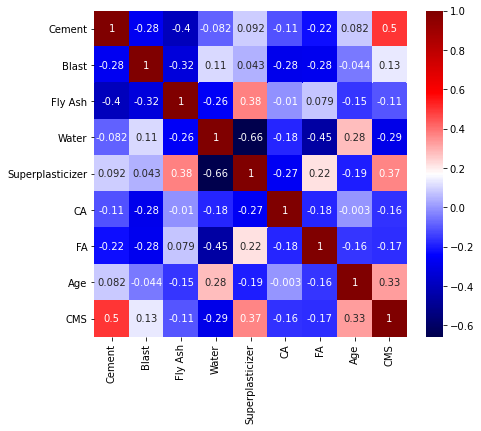

In [9]:
plt.figure(figsize=(7,6))
sns.heatmap(cor,annot=True,cmap='seismic')

In [10]:
cor_target=abs(cor['CMS'])

In [11]:
Main_features=cor_target[cor_target>0.1]
Main_features

Cement              0.497832
Blast               0.134829
Fly Ash             0.105755
Water               0.289633
Superplasticizer    0.366079
CA                  0.164935
FA                  0.167241
Age                 0.328873
CMS                 1.000000
Name: CMS, dtype: float64

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [13]:
scaled.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,-3.862875e-16,8.057740e-16,9.156645e-17,1.746176e-17,-3.951532e-16,7.295135e-16,-2.917030e-16,1.534910e-16,4.642726e-16
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715253e+00,-8.568879e-01,-8.471439e-01,-2.800211e+00,-1.039143e+00,-2.212138e+00,-2.240917e+00,-7.073594e-01,-2.005552e+00
25%,-8.500535e-01,-8.568879e-01,-8.471439e-01,-7.808939e-01,-1.039143e+00,-5.265174e-01,-5.319697e-01,-6.123314e-01,-7.251305e-01
50%,-7.915193e-02,-6.017783e-01,-8.471439e-01,1.608294e-01,3.271508e-02,-6.329352e-02,7.386739e-02,-2.797331e-01,-8.222491e-02
75%,6.589606e-01,8.007446e-01,1.002278e+00,4.887927e-01,6.691307e-01,7.267605e-01,6.291661e-01,1.637312e-01,6.178744e-01
max,2.477915e+00,3.310675e+00,2.281084e+00,3.065647e+00,4.353642e+00,2.214224e+00,2.733062e+00,5.057677e+00,2.801717e+00


In [14]:
X = df.drop('CMS', axis=1)
y= df['CMS']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [ 0.11980433  0.10386581  0.08793432 -0.14991842  0.2922246   0.01808621
  0.02019035  0.11422207]
Intercept: -23.331213584903317
R^2 score: 0.6155198704142721


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(721, 8)
(309, 8)
(309,)


In [16]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.6411898137954829
R^2 score for test: 0.541480523893522


In [17]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMS   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          6.29e-206
Time:                        23:00:29   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement               0.1198      0.008     14.113      0.000       0.103       0.136
Blast                0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash              0.0879      0.013      6.988      0.000       0.063       0.113
Water               -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer     0.2922      0.093      3.128      0.002       0.109       0.476
CA                   0.0181      0.009      1.926      0.054      -0.000       0.037
FA                   0.0202      0.011      1.887      0.059      -0.001       0.041
Age                  0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
df1=df.copy()

In [19]:
#Check the skewness
df1.skew()

Cement              0.509481
Blast               0.800717
Fly Ash             0.537354
Water               0.074628
Superplasticizer    0.907203
CA                 -0.040220
FA                 -0.253010
Age                 3.269177
CMS                 0.416977
dtype: float64